In [2]:
import os 
import sys 
sys.path.append("./trainer/")
print(sys.path)

['/home/cvipl/CV2020-project_iMaterialist', '/home/cvipl/anaconda3/envs/pytorch_env/lib/python37.zip', '/home/cvipl/anaconda3/envs/pytorch_env/lib/python3.7', '/home/cvipl/anaconda3/envs/pytorch_env/lib/python3.7/lib-dynload', '', '/home/cvipl/anaconda3/envs/pytorch_env/lib/python3.7/site-packages', '/home/cvipl/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/IPython/extensions', '/home/cvipl/.ipython', './trainer/']


In [3]:
from PIL import Image, ImageFile
import numpy as np 
import pandas as pd 
from pathlib import Path
from tqdm import tqdm, tqdm_notebook

In [4]:
from DataLoader import Fashion2020dataset

In [5]:
data_dir = Path("../imaterialist-fashion-2020-fgvc7")
df_csv   = Path("../imaterialist-fashion-2020-fgvc7/train.csv")

Dataloader = Fashion2020dataset(root= data_dir, transforms=None, csv_path=df_csv)

## COCO image viewer with Detectron2

In [6]:
import random 
import os 

In [7]:
import numpy as np 
import cv2 
import json 
import matplotlib.pyplot as plt 

In [9]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2.utils.visualizer import Visualizer, ColorMode

from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog

### Register dataset 

In [11]:
train_json_path = os.path.join(data_dir, 'train.json')
validation_json_path = os.path.join(data_dir, 'validation.json')

In [12]:
train_data_name = 'fashion_train'
val_data_name = 'fashion_val'


register_coco_instances(train_data_name, {}, train_json_path, os.path.join(data_dir, 'train') )
register_coco_instances(val_data_name, {}, validation_json_path, os.path.join(data_dir, 'train') )

### Visualize train dataset

[06/01 11:58:05 d2.data.datasets.coco]: Loading ../imaterialist-fashion-2020-fgvc7/train.json takes 16.79 seconds.
WARNING [06/01 11:58:05 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/01 11:58:05 d2.data.datasets.coco]: Loaded 41060 images in COCO format from ../imaterialist-fashion-2020-fgvc7/train.json
Path: ../imaterialist-fashion-2020-fgvc7/train/1f9a517a9b88f8c5e0d34779625e9cdc.jpg


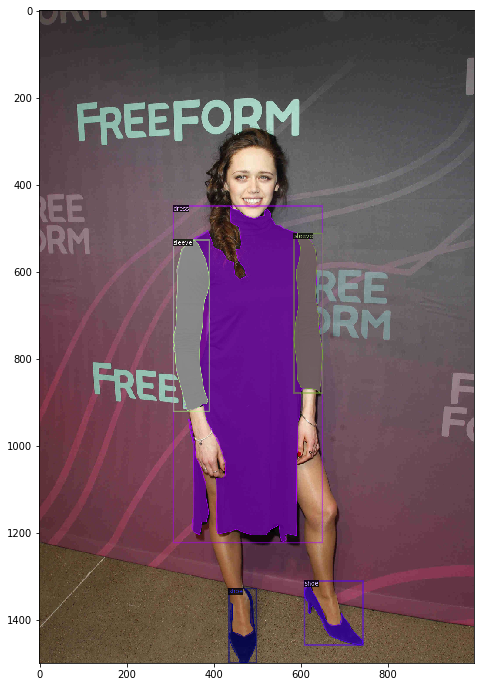

Path: ../imaterialist-fashion-2020-fgvc7/train/703600496c67406cdcc8835bf8724cbc.jpg


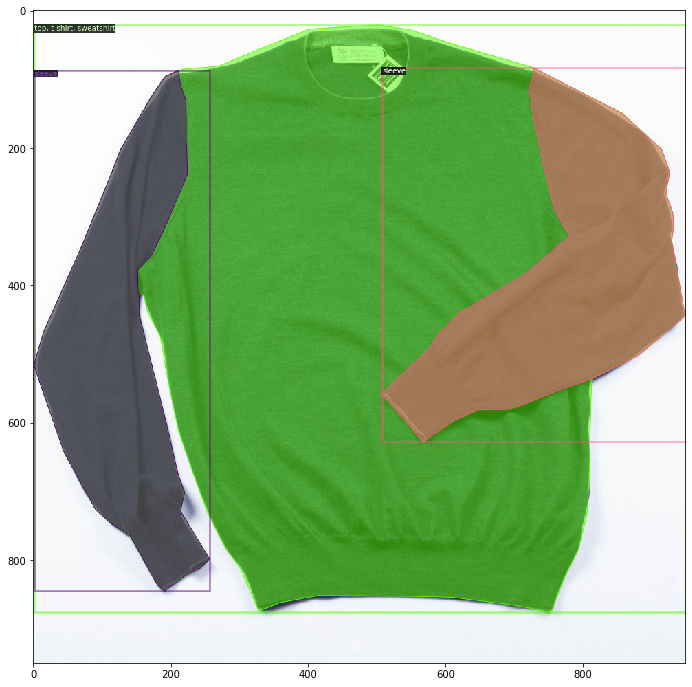

Path: ../imaterialist-fashion-2020-fgvc7/train/63004ca13db3d29d51cf240b3d424ea6.jpg


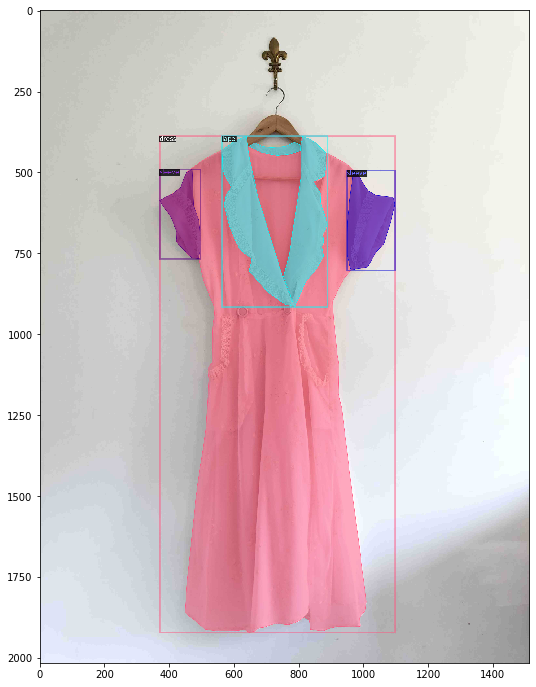

In [13]:
train_metadata = MetadataCatalog.get(train_data_name)

dataset_dicts = DatasetCatalog.get(name=train_data_name)

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    print("Path:",d["file_name"] )
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.figure(figsize = (12, 12))
    plt.imshow(vis.get_image())
    plt.show()

### Visualize validation dataset

[06/01 11:58:55 d2.data.datasets.coco]: Loading ../imaterialist-fashion-2020-fgvc7/validation.json takes 2.84 seconds.
WARNING [06/01 11:58:55 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/01 11:58:55 d2.data.datasets.coco]: Loaded 4563 images in COCO format from ../imaterialist-fashion-2020-fgvc7/validation.json
Path: ../imaterialist-fashion-2020-fgvc7/train/065975b102f1ed31c04071df06deda37.jpg


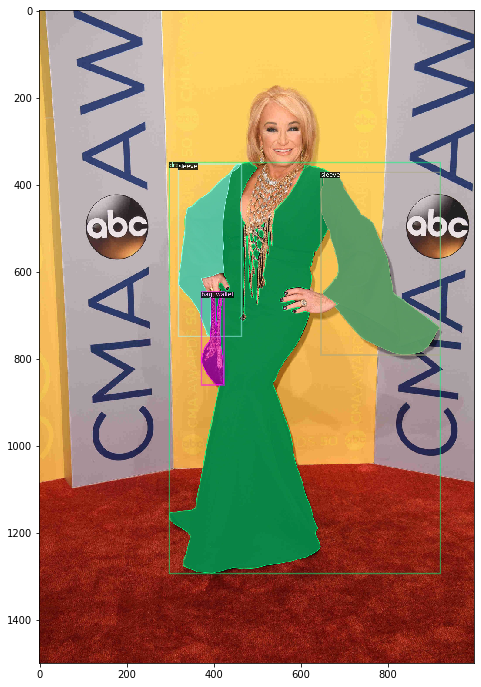

Path: ../imaterialist-fashion-2020-fgvc7/train/8537b711a744a4450f10d8000db37ab6.jpg


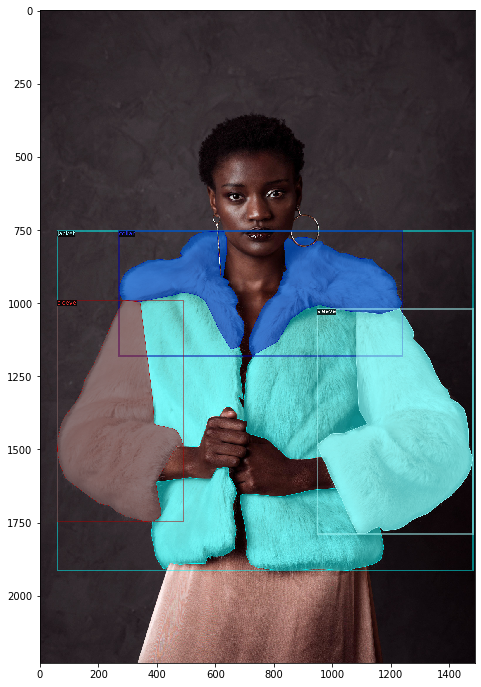

Path: ../imaterialist-fashion-2020-fgvc7/train/215631b4a0609666c8f537acc685bb9b.jpg


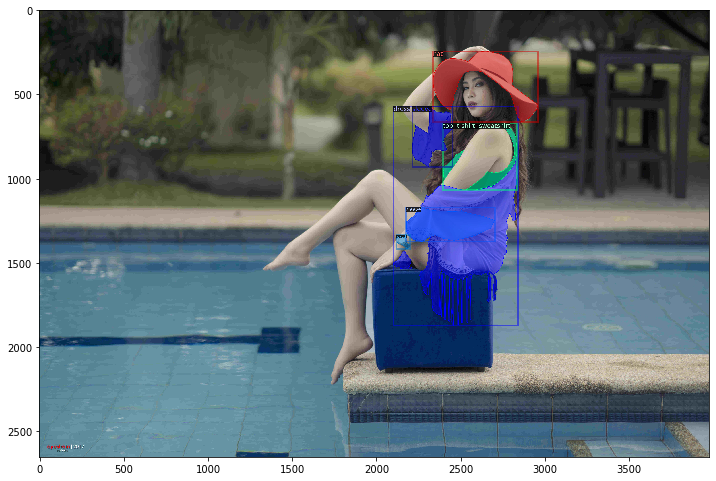

In [14]:
val_metadata = MetadataCatalog.get(val_data_name)

dataset_dicts = DatasetCatalog.get(name=val_data_name)

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    print("Path:",d["file_name"] )
    visualizer = Visualizer(img[:, :, ::-1], metadata=val_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.figure(figsize = (12, 12))
    plt.imshow(vis.get_image())
    plt.show()